# Anyonic models

We solve the almost-bosonic anyon model of https://arxiv.org/pdf/1901.10739.pdf

Iter     Function value   Gradient norm 
     0     8.189132e+01     1.517478e+01
 * time: 0.0042989253997802734
     1     6.216402e+01     8.968351e+00
 * time: 0.01342010498046875
     2     5.631436e+01     1.229048e+01
 * time: 0.03785204887390137
     3     3.977876e+01     8.625998e+00
 * time: 0.06834006309509277
     4     2.854642e+01     7.356985e+00
 * time: 0.09923005104064941
     5     1.904983e+01     4.635763e+00
 * time: 0.12596797943115234
     6     1.281221e+01     3.774704e+00
 * time: 0.15086793899536133
     7     1.027275e+01     7.087143e+00
 * time: 0.17094802856445312
     8     8.773639e+00     3.153219e+00
 * time: 0.2831540107727051
     9     7.885250e+00     2.292489e+00
 * time: 0.3055379390716553
    10     7.577941e+00     4.108857e+00
 * time: 0.32406187057495117
    11     7.012177e+00     2.701922e+00
 * time: 0.3413820266723633
    12     6.702583e+00     1.672777e+00
 * time: 0.3592798709869385
    13     6.494809e+00     2.620332e+00
 * time: 0

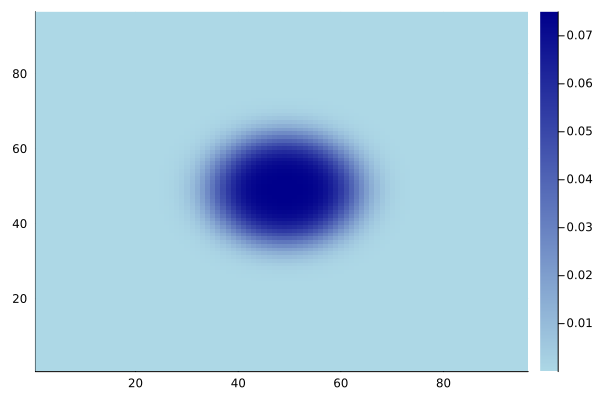

In [1]:
using DFTK
using StaticArrays
using Plots

# Unit cell. Having one of the lattice vectors as zero means a 2D system
a = 14
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

# Confining scalar potential
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2);

# Parameters
Ecut = 50
n_electrons = 1
β = 5;

# Collect all the terms, build and run the model
terms = [Kinetic(; scaling_factor=2),
         ExternalFromReal(X -> pot(X...)),
         Anyonic(1, β)
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-14)  # Reduce tol for production
E = scfres.energies.total
s = 2
E11 = π/2 * (2(s+1)/s)^((s+2)/s) * (s/(s+2))^(2(s+1)/s) * E^((s+2)/s) / β
println("e(1,1) / (2π)= ", E11 / (2π))
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)